In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import pickle
import numpy as np
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('cells/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
cellLabel = {}

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

#------------------------------------------------------------------------------  
# Thalamic Cells

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cellNumber['ss_RTN_o'] = int(382 * (210**2/150**2)) # from mouse model (d = 150 um)
cellNumber['ss_RTN_m'] = int(382 * (210**2/150**2))
cellNumber['ss_RTN_i'] = int(765 * (210**2/150**2))
cellNumber['VPL_sTC'] = int(656 * (210**2/150**2))
cellNumber['VPM_sTC'] = int(839 * (210**2/150**2))
cellNumber['POm_sTC_s1'] = int(685 * (210**2/150**2))

for mtype in thalamicpops: # No diversity
	metype = mtype
	popLabel[metype] = mtype
	popNumber[mtype] = cellNumber[metype]

#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------

## Load spkTimes and cells positions
with open('cells/spkTimes_v9_batch8_highgsynCT.pkl', 'rb') as fileObj: simData = pickle.load(fileObj)
spkTimes = simData['spkTimes']
cellsTags = simData['cellsTags']

# create custom list of spike times
cellsVSName = {}
for cellLabel in spkTimes.keys():    
    cellme = cellLabel.split('_')[0:-1]    
    metype = cellme[0]
    for i in range(1,np.size(cellme)):
        metype += '_' + cellme[i]
                   
    if metype not in cellsVSName.keys():
        cellsVSName[metype] = []
        
    mtype = popLabel[metype]            
    cellsVSName[metype].append('presyn_'+cellLabel)

#------------------------------------------------------------------------------
cynradNumber = 1
fracmorphoradius = 1.0/2.0

excluderadius2a = (cynradNumber-1)*(0.5*fracmorphoradius)**2
excluderadius2b = (cynradNumber)*(0.5*fracmorphoradius)**2

Nmorpho = {}    
listmorphonumber = {}

print('radius from',420*np.sqrt(excluderadius2a),'to',420*np.sqrt(excluderadius2b),'micrometers')

#------------------------------------------------------------------------------
# create 1 vectstim pop per cell gid
for metype in cellsVSName.keys(): # metype
       
    for cellLabel in cellsVSName[metype]: # all cells in metype

        mtype = popLabel[metype]    
        ii = int(cellLabel.split('_')[-1])
        radiuscCell2 = (cellsTags[ii]['xnorm']-0.5)**2 + (cellsTags[ii]['znorm']-0.5)**2

        if metype[0] == 'L' and radiuscCell2 >= excluderadius2a and radiuscCell2 < excluderadius2b:   

            if metype not in listmorphonumber.keys():
                listmorphonumber[metype] = []

            listmorphonumber[metype].append(ii)     

            if metype not in Nmorpho.keys():
                Nmorpho[metype] = 0

            Nmorpho[metype] += 1

#------------------------------------------------------------------------------
Epopsall = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
Epops = [] 
S1pops = []
S1cells = []
popLabelEl = {}

for metype in  Nmorpho.keys(): # metype      
    if  Nmorpho[metype] > 0:  
        S1cells.append(metype)
        mtype = popLabel[metype]            
        if mtype in Epopsall:            
            if mtype not in Epops:
                Epops.append(mtype)
                S1pops.append(mtype)
                popLabelEl[mtype] = [] 
            popLabelEl[mtype].append(metype)            
        else:            
            if mtype not in Ipops:                
                Ipops.append(mtype)  
                S1pops.append(mtype)  
                popLabelEl[mtype] = [] 
            popLabelEl[mtype].append(metype)      

Ecells = [] 
Icells = [] 
for metype in S1cells: # metype      
    mtype = popLabel[metype]            
    if mtype in Epopsall:  
        Ecells.append(metype)      
    else:  
        Icells.append(metype)

#------------------------------------------------------------------------------  
#
#------------------------------------------------------------------------------  
popParamLabels = S1pops
cellParamLabels = S1cells

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
allpops = cellParamLabels

RP_L13 = []
RP_L45 = []
RP_L6 = []

for metype in S1cells:

    layernumber = float(metype[1:2])
    if cellNumber[metype]*0.01 > 0.0:
        if int(layernumber) <= 3:
            RP_L13.append(metype)
            # print(layernumber,int(layernumber),metype)
        elif int(layernumber) == 6:
            RP_L6.append(metype)
            # print(layernumber,int(layernumber),metype)
        else:
            RP_L45.append(metype)
            # print(layernumber,int(layernumber),metype)


radius from 0.0 to 63.00630063006301 micrometers


In [35]:
import pickle
import numpy as np

filepkl = '../data/v1_batch1/v1_batch1_0_traces.pkl'
with open(filepkl, 'rb') as fileObj: connData = pickle.load(fileObj)

print(connData.keys())

dict_keys(['tracesData', 'include', 'timeRange', 'oneFigPer', 'saveData', 'saveFig', 'showFig'])


In [40]:
trcList = []
for trc in connData['tracesData']:
    trcList.append(list(trc.keys())[1])
    # print(list(trc.keys())[1])
    # plt.plot(trc['t'][1:], trc[list(trc.keys())[1]])    
print(np.size(trcList),np.size(S1cells))

141 141


In [41]:
S1cells[35:44]

['L23_SBC_cAC',
 'L23_SBC_dNA',
 'L4_BP_bAC',
 'L4_BP_bNA',
 'L4_BP_cAC',
 'L4_BTC_bST',
 'L4_BTC_cAC',
 'L4_DBC_bIR',
 'L4_DBC_bNA']

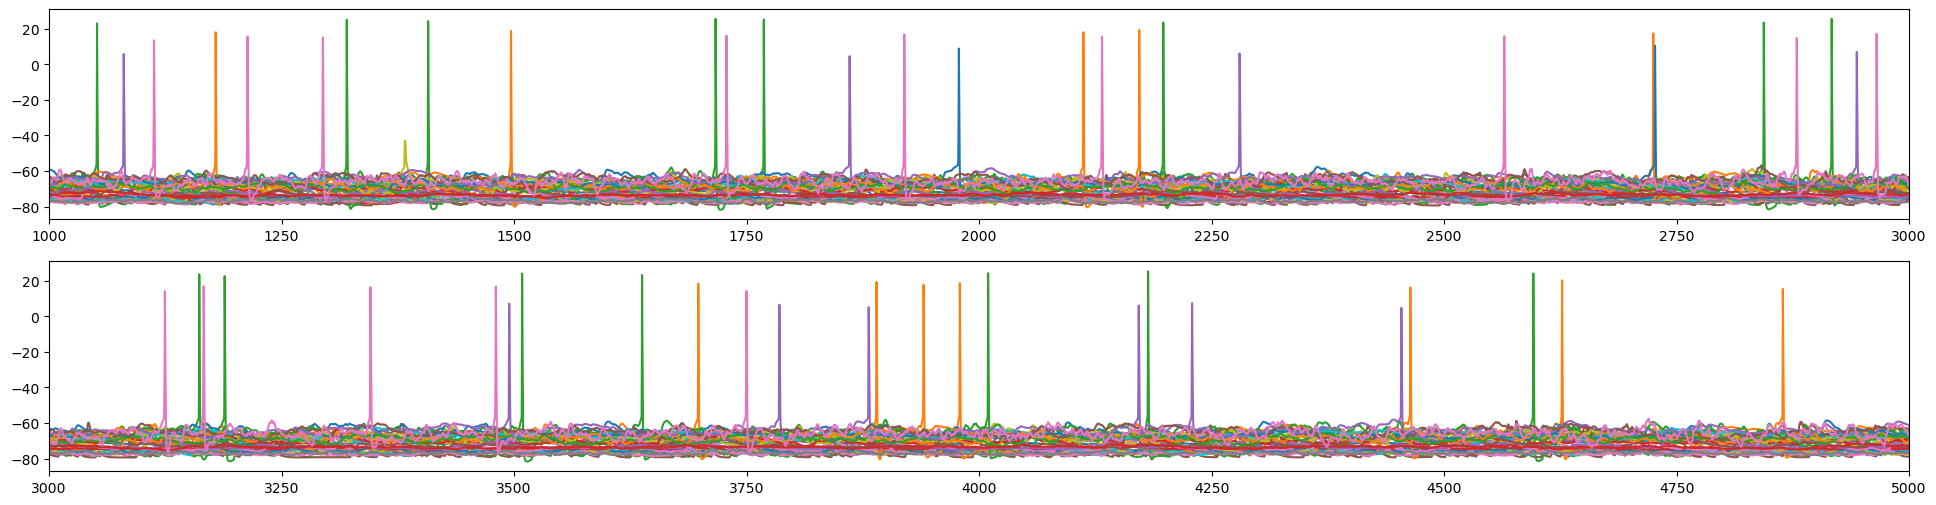

In [44]:
figure = plt.figure(figsize=(24,6))
plt.subplot(2,1,1)
for ii,trcName in enumerate(trcList[0:37]):
    plt.plot(connData['tracesData'][0]['t'][1:], connData['tracesData'][ii][trcName])   
    plt.xlim(1000,3000)
plt.subplot(2,1,2)
for ii,trcName in enumerate(trcList[0:37]):
    plt.plot(connData['tracesData'][0]['t'][1:], connData['tracesData'][ii][trcName])   
    plt.xlim(3000,5000)

In [68]:
filepkl = '../data/v1_batch1/v1_batch1_0_spike_data.pkl'

with open(filepkl, 'rb') as fileObj: connData = pickle.load(fileObj)

print(connData.keys())

dict_keys(['spkTimes', 'spkInds', 'spkGids', 'popNumCells', 'popLabels', 'numNetStims', 'include', 'timeRange', 'maxSpikes', 'orderBy', 'axisArgs', 'legendLabels'])


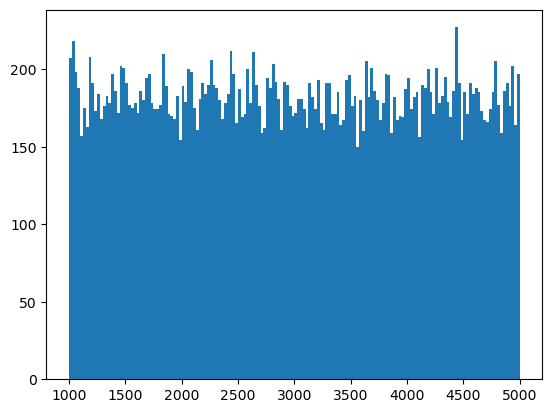

In [69]:
histraster = plt.hist(connData['spkTimes'], bins=range(1000,5025,25))  


(3000.0, 5000.0)

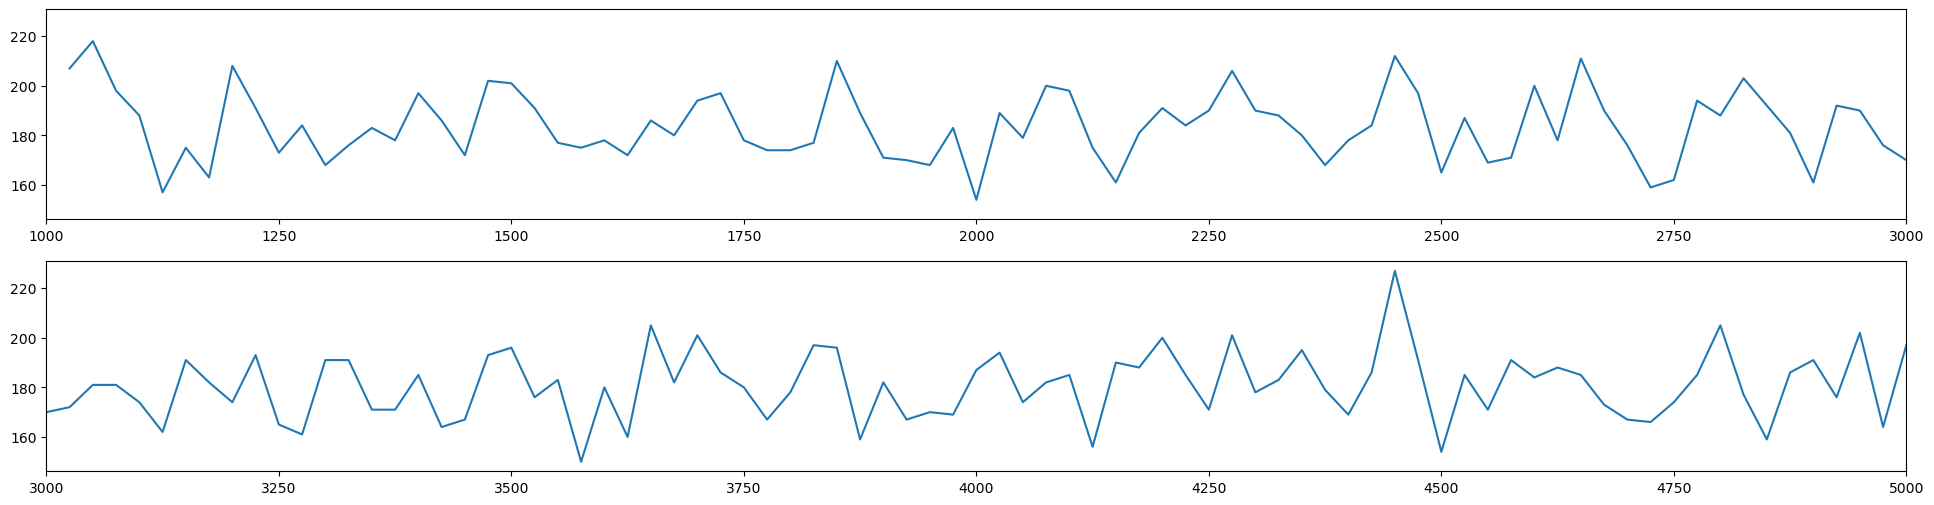

In [70]:
figure = plt.figure(figsize=(24,6))
plt.subplot(2,1,1)
plt.plot(histraster[1][1:], histraster[0],'-')   
plt.xlim(1000,3000)
# plt.ylim(2800,0)

plt.subplot(2,1,2)
plt.plot(histraster[1][1:], histraster[0],'-')   
plt.xlim(3000,5000)
# plt.ylim(2800,0);

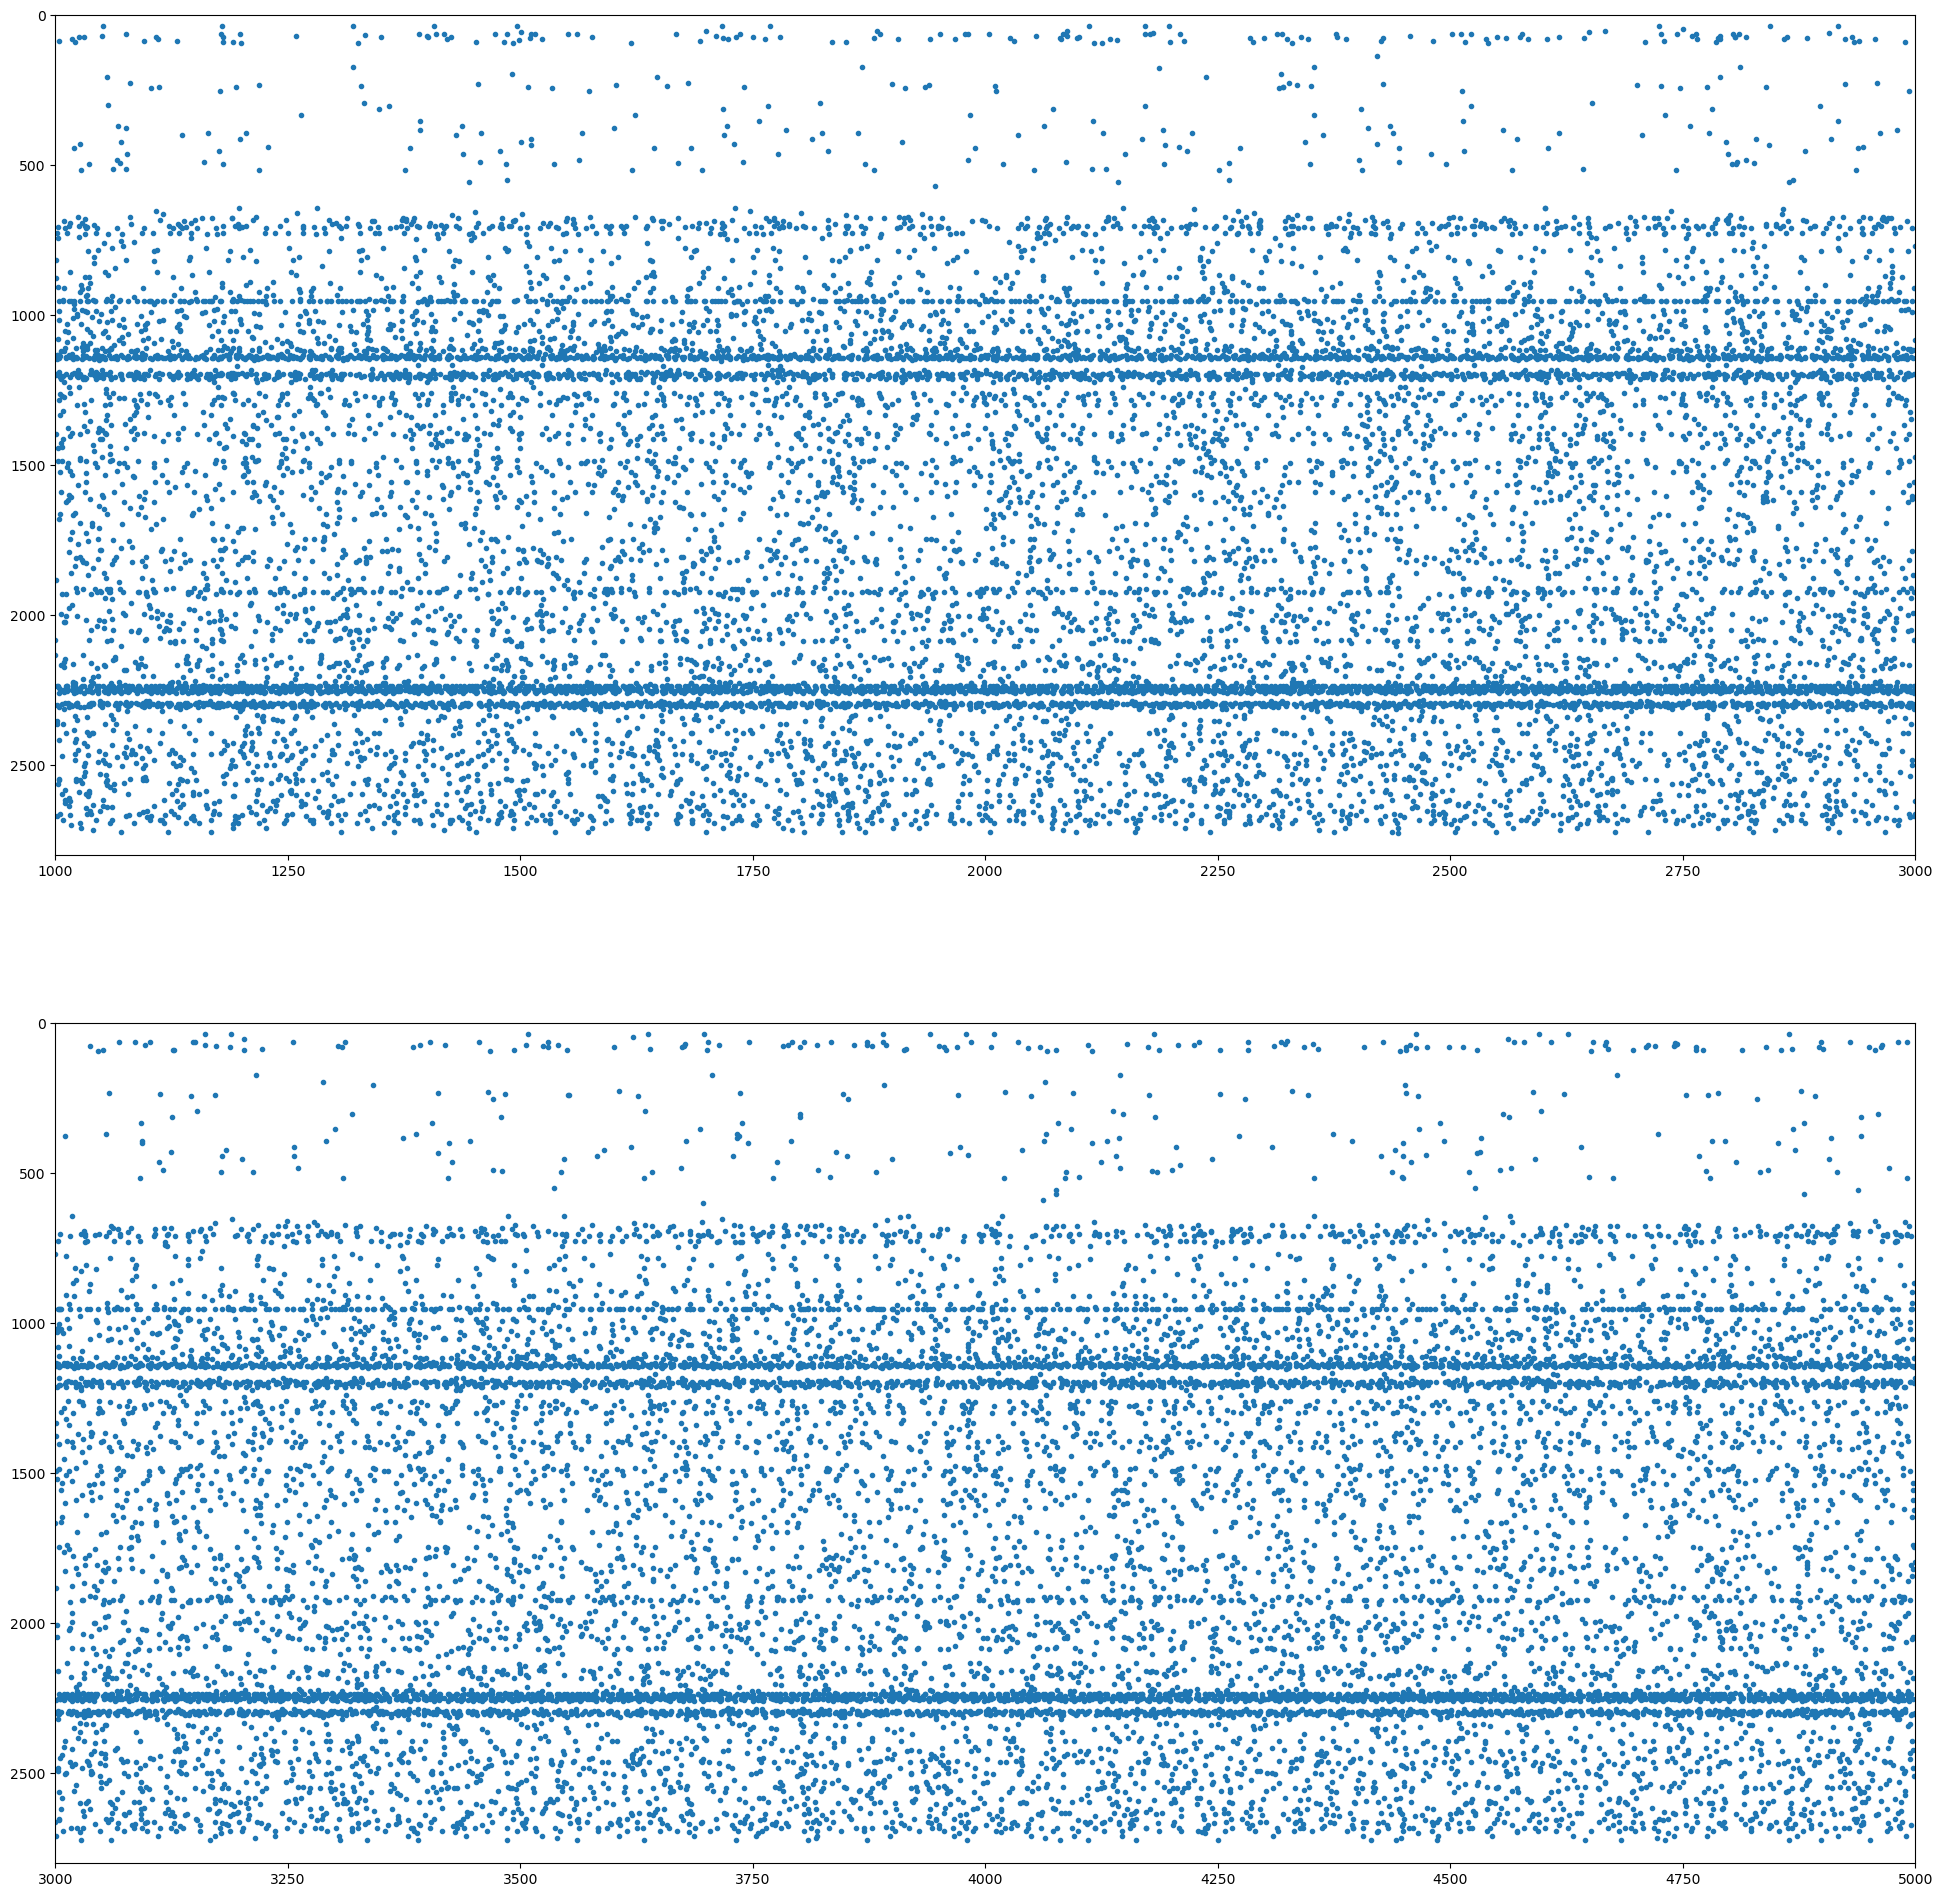

In [71]:
figure = plt.figure(figsize=(24,24))
plt.subplot(2,1,1)
plt.plot(connData['spkTimes'], connData['spkInds'],'.')   
plt.xlim(1000,3000)
plt.ylim(2800,0)

plt.subplot(2,1,2)
plt.plot(connData['spkTimes'], connData['spkInds'],'.')   
plt.xlim(3000,5000)
plt.ylim(2800,0);

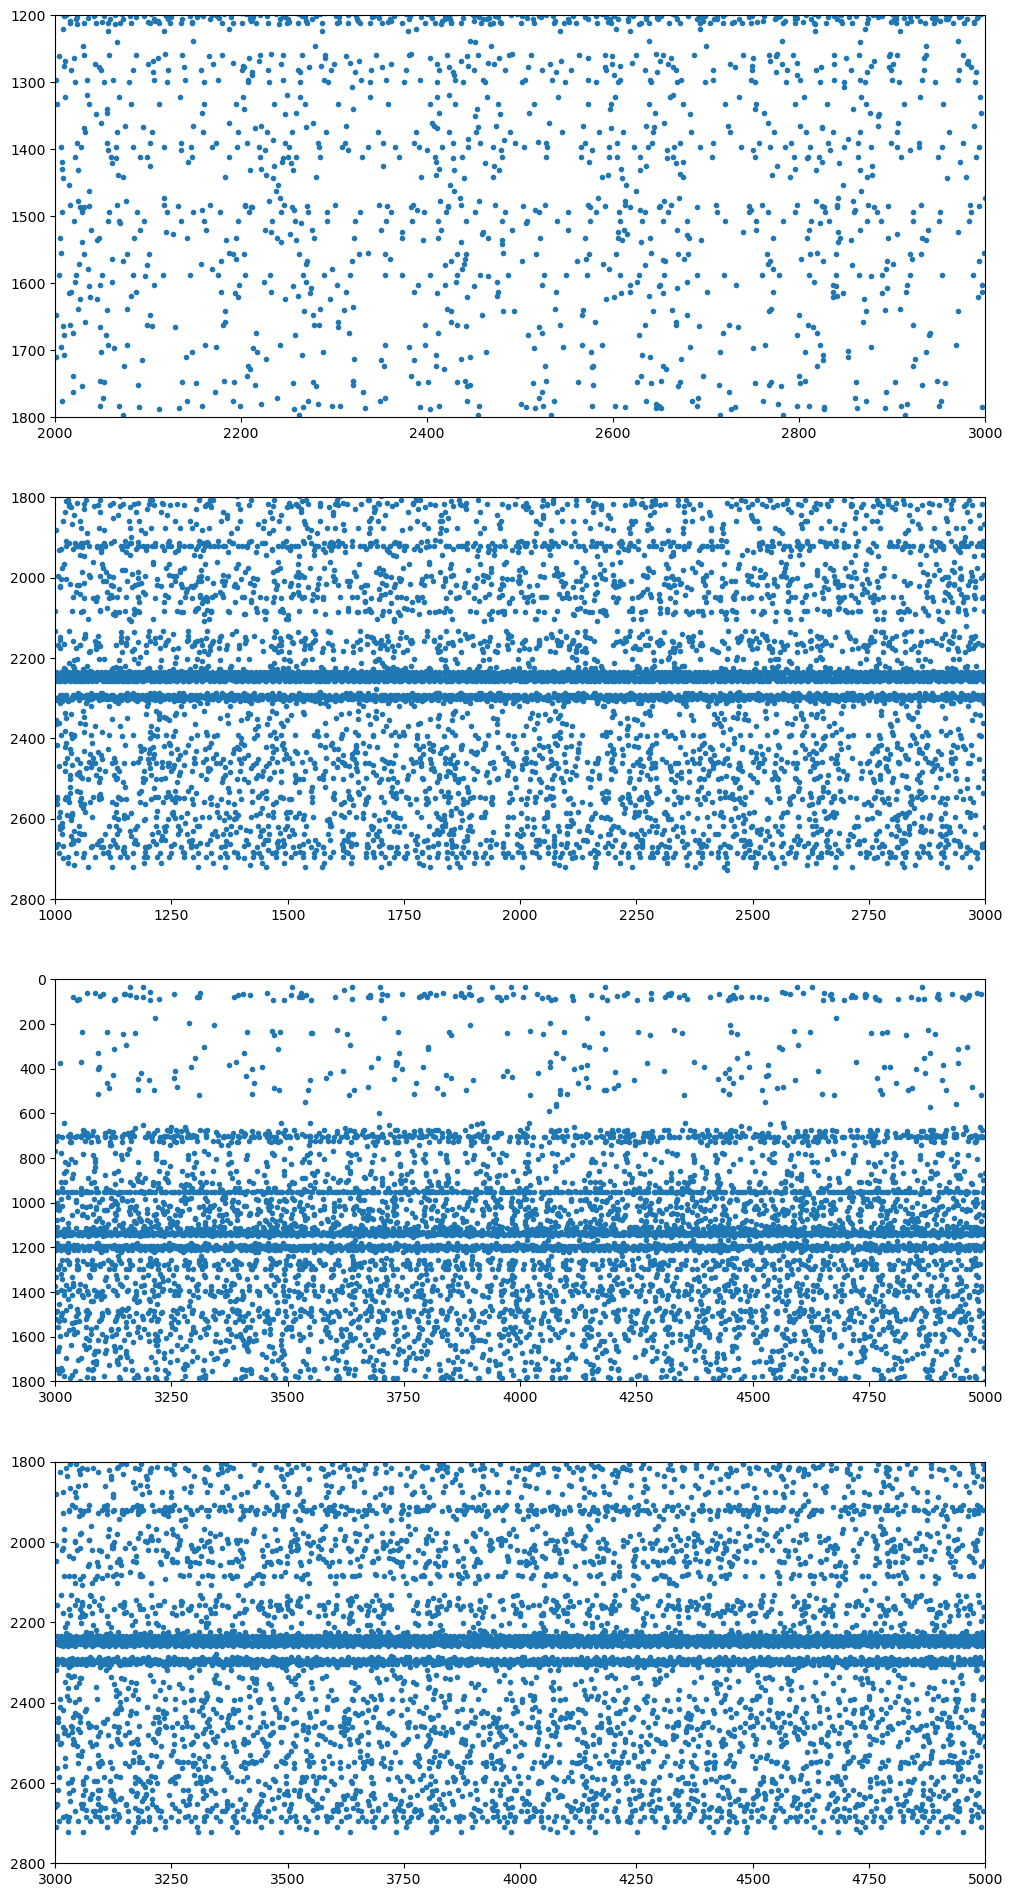

In [74]:
figure = plt.figure(figsize=(12,24))
plt.subplot(4,1,1)
plt.plot(connData['spkTimes'], connData['spkInds'],'.')   
plt.xlim(2000,3000)
plt.ylim(1800,1200)

plt.subplot(4,1,2)
plt.plot(connData['spkTimes'], connData['spkInds'],'.')   
plt.xlim(1000,3000)
plt.ylim(2800,1800)

plt.subplot(4,1,3)
plt.plot(connData['spkTimes'], connData['spkInds'],'.')   
plt.xlim(3000,5000)
plt.ylim(1800,0);

plt.subplot(4,1,4)
plt.plot(connData['spkTimes'], connData['spkInds'],'.')   
plt.xlim(3000,5000)
plt.ylim(2800,1800);

In [64]:
ls

ANALISIS_PKL_DATA.ipynb  init.py
batch.py                 Load_NetPyNE_Extracellular.ipynb
cells/                   load_plot.py
cellwrapper.py*          mod/
cfg.py                   netParams.py
conn/                    NetPyNE_Extracellular.ipynb
